# Cleaning the data

### Import libraries

In [1]:
import pandas as pd
import numpy as np

### Read the data into a dataframe

In [2]:
data = pd.read_csv('austin_weather.csv')
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


### Drop unnecessary columns in the data

In [3]:
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1)

### Replace 'T' values with 0 ('T' represents trace rainfall)

In [4]:
data = data.replace('T', 0.0)

### Replace '-' values with 0 ('-' represents data not available)

In [5]:
data = data.replace('-', 0.0)

### Save the data in a csv file

In [6]:
data.to_csv('austin_weather_cleaned.csv')

# Train LinearRegression model and use it to predict new data

### Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

### Read the cleaned data

In [8]:
data = pd.read_csv('austin_weather_cleaned.csv')

### Select the features and labels

In [11]:
X = data.drop(['PrecipitationSumInches'], axis = 1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1) #reshape into a 2-d vector

### Consider a random day in the dataset, we shall plot a graph and observe this day

In [12]:
day_index = 798
days = [i for i in range(Y.size)]

### Initialise a linear regression classifier

In [13]:
clf = LinearRegression()

### Train the data

In [14]:
clf.fit(X,Y)

LinearRegression()

### Give a sample input to test our model

In [15]:
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], 
                  [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1,-1)

In [16]:
print('The precipitation in inches for the input is: ', clf.predict(inp))

The precipitation in inches for the input is:  [[1.33868402]]


### Plot a graph of precipitation levels versus the number of days

The precipitation trend graph: 


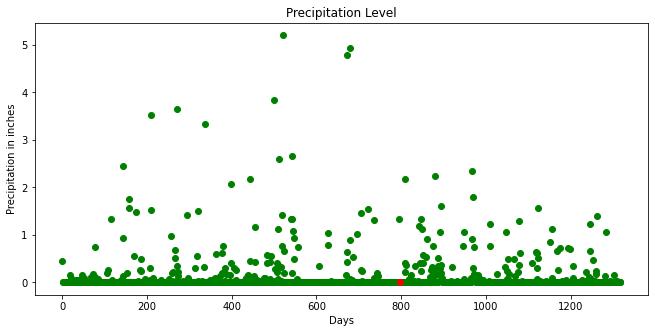

In [39]:
print('The precipitation trend graph: ')
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('Precipitation Level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()

### Plot a graph with a few features (x values) against the precipitation to observe trends

In [40]:
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)

Precipitation vs selected attributes graph: 


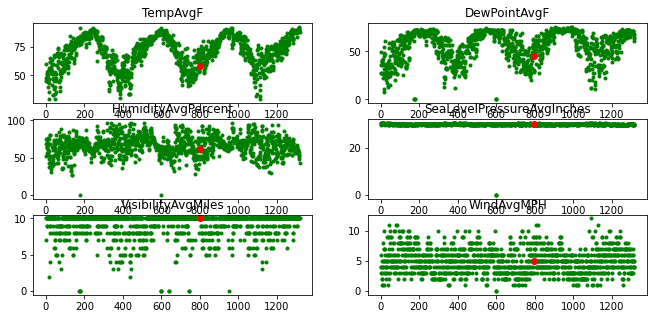

In [43]:
print('Precipitation vs selected attributes graph: ')

plt.rcParams["figure.figsize"] = (11,5)



for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                                               color = 'g',
                                            marker='.')
  
    plt.scatter(days[day_index], 
                x_vis[x_vis.columns.values[i]][day_index],
                color ='r')
    plt.title(x_vis.columns.values[i])
    
   
plt.show()